# DNN (Deep Neural Network) :

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score

# Chargement du dataset
df = pd.read_csv('../dataset_smote.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Créez le modèle DNN
model = models.Sequential()

# Couches fully connected (densément connectées) avec Dropout
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Entraînez le modèle avec plus d'epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))

# Prédictions sur l'ensemble de test avec un seuil de décision de 0.3
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.3)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"auc-Score: {auc:.2f}")


Epoch 1/50
23226/23226 [==============================] - 82s 3ms/step - loss: 0.5663 - accuracy: 0.7223 - val_loss: 0.5280 - val_accuracy: 0.7371
Epoch 2/50
23226/23226 [==============================] - 81s 3ms/step - loss: 0.5332 - accuracy: 0.7433 - val_loss: 0.4879 - val_accuracy: 0.7805
Epoch 3/50
23226/23226 [==============================] - 81s 4ms/step - loss: 0.5062 - accuracy: 0.7682 - val_loss: 0.5233 - val_accuracy: 0.7705
Epoch 4/50
23226/23226 [==============================] - 82s 4ms/step - loss: 0.4908 - accuracy: 0.7785 - val_loss: 0.6036 - val_accuracy: 0.7525
Epoch 5/50
23226/23226 [==============================] - 82s 4ms/step - loss: 0.4814 - accuracy: 0.7837 - val_loss: 0.6250 - val_accuracy: 0.7444
Epoch 6/50
23226/23226 [==============================] - 83s 4ms/step - loss: 0.4748 - accuracy: 0.7869 - val_loss: 0.6339 - val_accuracy: 0.7428
Epoch 7/50
23226/23226 [==============================] - 83s 4ms/step - loss: 0.4686 - accuracy: 0.7896 - val_loss: 0

In [3]:

# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


dnn_results = pd.DataFrame([['Deep neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
dnn_results.to_csv('../evaluations/dnn_results.csv', index=False)

dnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Deep neurual network,0.767547,0.707717,0.911578,0.796815,0.767544


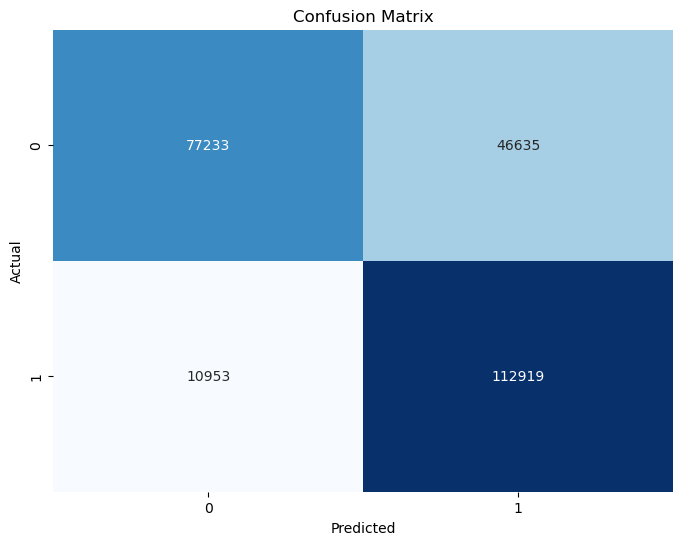

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()